In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
crop_data = pd.read_csv('C:/Users/kenneth/OneDrive/Desktop/dev/Python Projects/Unified Mentor Internship/Crop Production Analysis in India/Crop Production data.csv')
crop_data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [72]:
#checking for null values
crop_data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [6]:
#creating a copy of the data
crop_data_copy = crop_data

In [74]:
#removing the null values
crop_data_copy.dropna(subset = ['Production'],inplace = True)

In [75]:
crop_data_copy.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [76]:
crop_data_copy.shape

(242361, 7)

242361 rows and 7 columns

In [8]:
#checking the unique type of season
crop_data_copy.Season.unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [78]:
#checking the unique district name
crop_data_copy.District_Name.unique()

array(['NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS',
       'ANANTAPUR', 'CHITTOOR', 'EAST GODAVARI', 'GUNTUR', 'KADAPA',
       'KRISHNA', 'KURNOOL', 'PRAKASAM', 'SPSR NELLORE', 'SRIKAKULAM',
       'VISAKHAPATANAM', 'VIZIANAGARAM', 'WEST GODAVARI', 'ANJAW',
       'CHANGLANG', 'DIBANG VALLEY', 'EAST KAMENG', 'EAST SIANG',
       'KURUNG KUMEY', 'LOHIT', 'LONGDING', 'LOWER DIBANG VALLEY',
       'LOWER SUBANSIRI', 'NAMSAI', 'PAPUM PARE', 'TAWANG', 'TIRAP',
       'UPPER SIANG', 'UPPER SUBANSIRI', 'WEST KAMENG', 'WEST SIANG',
       'BAKSA', 'BARPETA', 'BONGAIGAON', 'CACHAR', 'CHIRANG', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'DIMA HASAO', 'GOALPARA',
       'GOLAGHAT', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KAMRUP METRO',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MARIGAON',
       'NAGAON', 'NALBARI', 'SIVASAGAR', 'SONITPUR', 'TINSUKIA',
       'UDALGURI', 'ARARIA', 'ARWAL', 'AURANGABAD', 'BANKA', 'BEGUSARAI',
       'BHAGALPUR', 'BHOJPUR', 'B

In [79]:
#checking unique state name
crop_data_copy.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [80]:
#checking unique crop name
crop_data_copy.Crop.unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Mesta', 'Cowpea(Lobia)',
       'Lemon', 'Pome Granet', 'Sapota', 'Cabbage', 'Rapeseed &Mustard',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Varagu',
       'Garl

In [81]:
#removing unwanted white spaces from season column
crop_data_copy['Season'] = crop_data_copy['Season'].apply(lambda x : x.strip()) #it access the Season column from the data and takes the string from the column and applies the lambda function which is strip here that removes trailing and leading whitespaces.
crop_data_copy['Crop'] = crop_data_copy['Crop'].apply(lambda x : x.strip())
crop_data_copy['State_Name'] = crop_data_copy['State_Name'].apply(lambda x : x.strip())

In [82]:
#checking if the whitespaces have been removed
crop_data_copy.Season.unique()

array(['Kharif', 'Whole Year', 'Autumn', 'Rabi', 'Summer', 'Winter'],
      dtype=object)

In [83]:
crop_data_copy.Crop.unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Mesta', 'Cowpea(Lobia)',
       'Lemon', 'Pome Granet', 'Sapota', 'Cabbage', 'Rapeseed &Mustard',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Varagu',
       'Garli

In [84]:
crop_data_copy.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [85]:
#checking the value count of each section
crop_data_copy['Season'].value_counts()

Season
Kharif        94283
Rabi          66160
Whole Year    56127
Summer        14811
Winter         6050
Autumn         4930
Name: count, dtype: int64

In [86]:
crop_data_copy['Crop'].value_counts()

Crop
Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
                     ...  
Litchi                   6
Coffee                   6
Apple                    4
Peach                    4
Other Dry Fruit          1
Name: count, Length: 124, dtype: int64

In [87]:
crop_data_copy['State_Name'].value_counts()

State_Name
Uttar Pradesh                  33189
Madhya Pradesh                 22604
Karnataka                      21079
Bihar                          18874
Assam                          14622
Odisha                         13524
Tamil Nadu                     13266
Maharashtra                    12496
Rajasthan                      12066
Chhattisgarh                   10368
West Bengal                     9597
Andhra Pradesh                  9561
Gujarat                         8365
Telangana                       5591
Uttarakhand                     4825
Haryana                         4540
Kerala                          4003
Nagaland                        3904
Punjab                          3143
Meghalaya                       2867
Arunachal Pradesh               2545
Himachal Pradesh                2456
Jammu and Kashmir               1632
Tripura                         1412
Manipur                         1266
Jharkhand                       1266
Mizoram                    

In [88]:
#since summer and autumn are synonymns for Kharif and winter is synonymns for winter we will replace them respectively
crop_data_copy['Season'] = crop_data_copy['Season'].apply(lambda x : x.replace('Autumn','Kharif')) # Autumn will get replaced by Kharif
crop_data_copy['Season'] = crop_data_copy['Season'].apply(lambda x : x.replace('Summer','Kharif'))
crop_data_copy['Season'] = crop_data_copy['Season'].apply(lambda x : x.replace('Winter','Rabi')) # Winter will get replaced by Rabi

In [89]:
crop_data_copy.Season.value_counts()

Season
Kharif        114024
Rabi           72210
Whole Year     56127
Name: count, dtype: int64

In [90]:
#going through the data there are many rows whose production is 0. We will drop that row whose production is 0
crop_data_copy.drop(crop_data_copy[crop_data_copy['Production'] == 0].index, inplace = True)

In [91]:
#total number of rows after removing the rows whose production is 0
print('After removing the rows whose production is 0 ',crop_data_copy.shape[0])

After removing the rows whose production is 0  238838


In [92]:
#going through the Crop column we face a similar condition to that of season. There are some terms that are synonym with each other like Rice and paddy mean the same, kapas and cotton mean the same and so on. Also the subcategory of pules are really small so we'll group them
crop_data_copy['Crop'] = crop_data_copy['Crop'].apply(lambda x : x.replace('Kapas','Cotton(lint)')
                                                     .replace('Cotton(lint)','Cotton'))

crop_data_copy['Crop'] = crop_data_copy['Crop'].apply(lambda x : x.replace('Jute & mesta','Jute'))
crop_data_copy.replace('Mesta','Jute',inplace = True)

In [93]:
#replacing the sub-category of pulses with pulse

crop_data['Crop'] = crop_data_copy['Crop'].apply(lambda x : x.replace('Other Kharif pulses','pulses')
                                                .replace('other Rabi pulses','pulses')
                                                .replace('Peas & beans (Pulses)','pulses')
                                                .replace('other misc. pulses','pulses')
                                                .replace('Moong(Green Gram)','pulses')
                                                .replace('Urad','pulses')
                                                .replace('Arhar/Tur','pulses')
                                                .replace('Bean','pulses')
                                                .replace('Ricebean (nagadal)','pulses')
                                                .replace('Lentil','pulses')
                                                .replace('Masoor','pulses')
                                                .replace('Khesari','pulses')
                                                .replace('Horse-gram','pulses')
                                                .replace('Rajmash Kholar','pulses'))

In [94]:
# correcting spelling mistake
crop_data_copy['Crop'] = crop_data_copy['Crop'].apply(lambda x : x.replace('Atcanut (Raw)','Arecanut')
                                                     .replace('Arcanut (Processed)','Arecanut')
                                                     .replace('Arecanut','Arecanut'))

In [95]:
#replacing variety of spices with other spices
crop_data_copy['Crop'] = crop_data_copy['Crop'].apply(lambda x : x.replace('Black pepper','Other Spices')
                                                     .replace('Cardamon','Other Spices')
                                                     .replace('Perilla','Other Spices'))

In [96]:
#since number of fruit categories are very less we will merge all the fruits under one category called fruits
crop_data_copy['Crop'] = crop_data_copy['Crop'].apply(lambda x : x.replace('Papaya','Fruits')
                                                     .replace('Mango','Fruits')
                                                     .replace('Orange','Fruits')
                                                     .replace('Other Fresh Fruits','Fruits')
                                                      .replace('Pineapple','Fruits')
                                                      .replace('Citrus','Fruits')
                                                      .replace('Pome Fruit','Fruits')
                                                      .replace('Pome Granet','Fruits')
                                                      .replace('Grapes','Fruits')
                                                      .replace('Jack Fruit','Fruits')
                                                      .replace('Sapota','Fruits')
                                                      .replace('Lemon','Fruits')
                                                     .replace('Fruits Fruit','Fruits'))
                                                      

In [97]:
#replacing sub-category with their main-category
crop_data_copy['Crop'] = crop_data_copy['Crop'].apply(lambda x : x.replace('Ginger','Dry ginger'))

crop_data_copy['Crop'] = crop_data_copy['Crop'].apply(lambda x : x.replace('Turnip','Onion'))

crop_data_copy['Crop'] = crop_data_copy['Crop'].apply(lambda x : x.replace('Cashewnut Raw','Cashewnut')
                                                     .replace('Cashewnut Processed','Cashewnut'))

In [98]:
#replacing the sub-category of gram with their main-category(pulses)
crop_data_copy['Crop'] = crop_data_copy['Crop'].apply(lambda x : x.replace('Blackgram','pulses')
                                                     .replace('Moth','pulses'))

In [99]:
#replacing oilseeds to other Oilseeds
crop_data_copy['Crop'] = crop_data_copy['Crop'].apply(lambda x : x.replace('Oilseeds total','other oilseeds')
                                                     .replace('Niger seed','other oilseeds'))

In [100]:
#replacing sub-category of millets to other Millets
crop_data_copy['Crop'] = crop_data_copy['Crop'].apply(lambda x : x.replace('Other Cereals & Millets','Millets')
                                                     .replace('Samai','Millets')
                                                     .replace('Small millets','Millets')
                                                     .replace('Ragi','Millets')
                                                     .replace('Varagu','Millets')
                                                     .replace('Jobster','Millets')
                                                     .replace('Bajra','Millets'))

In [101]:
#replacing sub-category of vegetables with their main-catgeory
crop_data_copy['Crop'] = crop_data_copy['Crop'].apply(lambda x : x.replace('Coriander','Other Vegetables')
                                                     .replace('pulsess & Mutter(Vegetable)','Other Vegetables')
                                                     .replace('Bhindi','Other Vegetables')
                                                     .replace('Tomato','Fruits')
                                                     .replace('Coupen(Lobia)','Other Vegetables')
                                                     .replace('Cabbage','Other Vegetables')
                                                     .replace('Carrot','Other Vegetables')
                                                     .replace('Drum Stick','Other Vegetables')
                                                     .replace('Redish','Other Vegetables')
                                                     .replace('Cauliflower','Other Vegetables')
                                                     .replace('Colocosta','Other Vegetables')
                                                     .replace('Brinjal','Other Vegetables')
                                                     .replace('Bottle Gourd','Other Vegetables')
                                                     .replace('Bitter Gourd','Other Vegetables')
                                                     .replace('Other Vegetbles','Other Vegetables'))

In [102]:
#replacing sub-category with their main-category
crop_data_copy['Crop'] = crop_data_copy['Crop'].apply(lambda x : x.replace('Niger seed','Sesamum'))
crop_data_copy['Crop'] = crop_data_copy['Crop'].apply(lambda x : x.replace('Korra','Total foodgrain'))
crop_data_copy['Crop'] = crop_data_copy['Crop'].apply(lambda x : x.replace('Paddy','Rice'))



In [103]:
#checking unique crop types after modifications
crop_data_copy['Crop'].unique()

array(['Arecanut', 'pulses', 'Rice', 'Banana', 'Cashewnut', 'Coconut',
       'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Other Spices', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Groundnut', 'Sunflower', 'Millets', 'Castor seed',
       'Cotton', 'Jowar', 'Total foodgrain', 'Tobacco', 'Gram', 'Wheat',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'Other Vegetables',
       'Potato', 'Other  Rabi pulses', 'Fruits', 'Soyabean', 'Jute',
       'Cowpea(Lobia)', 'Rapeseed &Mustard', 'Garlic', 'Pulses total',
       'Barley', 'Sannhamp', 'Guar seed', 'Cond-spcs other', 'Cardamom',
       'Rubber', 'Tea', 'Coffee', 'Colocosia'], dtype=object)

In [104]:
#saving the cleaned data
crop_data_copy.to_excel(r'C:/Users/kenneth/OneDrive/Desktop/dev/Python Projects/Unified Mentor Internship/Crop Production Analysis in India/Crop Production Data Cleaned.xlsx')

In [105]:
#reviewing the file
crop_data_copy.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [106]:
crop_data_copy

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Kharif,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Kharif,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Rabi,Rice,279151.0,597899.0


In [107]:
#to find outlier new column called Production_area_factor has been created
crop_data_copy['Production_area_factor'] = crop_data_copy['Production']/crop_data_copy['Area']

In [108]:
crop_data_copy

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Production_area_factor
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,pulses,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167
...,...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Kharif,Rice,306.0,801.0,2.617647
246087,West Bengal,PURULIA,2014,Kharif,Sesamum,627.0,463.0,0.738437
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0,50.154321
246089,West Bengal,PURULIA,2014,Rabi,Rice,279151.0,597899.0,2.141848


In [109]:
#dividing the country into East, West, North and South India
West_India = ['Maharashtra','Goa','Gujarat','Dadra and Nagar Haveli']
East_India = ['Arunachal Pradesh','Assam','Manipur','Meghalaya','Mizoram','Nagaland','Sikhim','Tripura','West Bengal','Bihar','Jharkhand','Odisha']
North_India = ['Jammu and Kashmir','Himachal Pradesh','Punjab','Uttarakhand','Haryana','Rajasthan','Uttar Pradesh','Chandigarh','Madhya Pradesh','Chattisgarh']
South_India = ['Andhra Pradesh','Karnataka','Kerala','Tamil Nadu','Telangana','Puducherry']

In [110]:
#creating a list for zones
zone = []

for state in crop_data_copy['State_Name']:
    if state in West_India:
        zone.append('West India')
    elif state in East_India:
        zone.append('East India')
    elif state in North_India:
        zone.append('North India')
    elif state in South_India:
        zone.append('South India')
    else:
        zone.append('Union Territory')

In [111]:
#creating a new column
crop_data_copy['Zone'] = zone

In [112]:
crop_data_copy.isnull().sum()

State_Name                0
District_Name             0
Crop_Year                 0
Season                    0
Crop                      0
Area                      0
Production                0
Production_area_factor    0
Zone                      0
dtype: int64

In [113]:
crop_data_copy

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Production_area_factor,Zone
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896,Union Territory
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,pulses,2.0,1.0,0.500000,Union Territory
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059,Union Territory
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045,Union Territory
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167,Union Territory
...,...,...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Kharif,Rice,306.0,801.0,2.617647,East India
246087,West Bengal,PURULIA,2014,Kharif,Sesamum,627.0,463.0,0.738437,East India
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0,50.154321,East India
246089,West Bengal,PURULIA,2014,Rabi,Rice,279151.0,597899.0,2.141848,East India


In [114]:
#counting the number of each zones in the data frame
crop_data_copy['Zone'].value_counts()

Zone
North India        82407
East India         70815
South India        53109
West India         21229
Union Territory    11278
Name: count, dtype: int64

In [115]:
crop_data_copy['Season'].value_counts()

Season
Kharif        113499
Rabi           71954
Whole Year     53385
Name: count, dtype: int64

In [116]:
#saving the cleaned data
crop_data_copy.to_excel(r'C:/Users/kenneth/OneDrive/Desktop/dev/Python Projects/Unified Mentor Internship/Crop Production Analysis in India/Crop Production Data Cleaned.xlsx')

In [117]:
Q1 = crop_data_copy['Area'].quantile(0.25) #finds the value below which 25% of the data in Area column falls
Q2 = crop_data_copy['Area'].quantile(0.75) #finds the value below which 75% of the data in Area column falls

Q1,Q2

(91.0, 4700.0)

In [118]:
#Finding Interquartile Range (IQR) of a dataset. It is a measure of statistical dispersion or variability in a dataset. Calculated as the difference between the third quartile and the first quartile. It provides a measure of where the central 50% of the data lies and is used to understand the spread and detect potential outliers in the dataset. Outliers are typically defined as data points that fall below Q1 - 1.5 * IQR or above Q2 + 1.5 * IQR. Outliers are data points that are significantly different from the rest of the data in a dataset. They can be unusually high or low values compared to the majority of the data points.
IQR = Q2 - Q1 

In [119]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q2 + 1.5*IQR
lower_limit, upper_limit

(-6822.5, 11613.5)

In [120]:
crop_data_copy['Area']

0           1254.0
1              2.0
2            102.0
3            176.0
4            720.0
            ...   
246086       306.0
246087       627.0
246088       324.0
246089    279151.0
246090       175.0
Name: Area, Length: 238838, dtype: float64

In [121]:
#Finding outlier for each crop
area_outlier = crop_data_copy[(crop_data_copy['Area'] < lower_limit) | (crop_data_copy['Area'] > upper_limit)]

In [122]:
#Counting how many times each crop appears in the 'area_outlier' DataFrame
area_outlier['Crop'].value_counts()

Crop
Rice                  9138
Wheat                 5080
pulses                4509
Maize                 2514
Millets               2312
Gram                  1974
Jowar                 1902
Cotton                1474
Rapeseed &Mustard     1469
Groundnut             1449
Sugarcane             1321
Soyabean              1069
Sesamum                574
Coconut                556
Sunflower              498
Potato                 387
Jute                   298
Guar seed              246
Castor seed            241
other oilseeds         238
Other  Rabi pulses     175
Dry chillies           173
Arecanut               169
Cashewnut              163
Barley                 154
Total foodgrain        153
Tobacco                144
Safflower              137
Linseed                 99
Other Vegetables        98
Tapioca                 93
Pulses total            87
Onion                   83
Fruits                  67
Other Spices            55
Banana                  33
Turmeric               

In [123]:
crop_data_copy['Crop_Year'].value_counts()

Crop_Year
2003    15550
2002    15094
2007    14269
2008    14230
2006    13976
2004    13834
2010    13793
2011    13791
2009    13767
2005    13519
2013    13474
2000    13401
2012    13183
2001    13139
1999    12282
1998    11262
2014    10814
1997     8899
2015      561
Name: count, dtype: int64

In [124]:
#calculating the val which is the values in the Prodcution column obtained after sorting it crop name wise in descending order by Production value and lab is the index of the same
val = crop_data_copy.groupby('Crop').sum().sort_values(by = 'Production',ascending = False)['Production'].values
lab = crop_data_copy.groupby('Crop').sum().sort_values(by = 'Production',ascending = False)['Production'].index

([<matplotlib.patches.Wedge at 0x269f3c01350>,
 [Text(-1.0660452224070727, 0.2711965777495268, 'Coconut'),
  Text(1.023543824045941, -0.4029367695525094, 'Sugarcane'),
  Text(1.0745757058775323, -0.2351319891843798, 'Rice'),
  Text(1.0877585363540863, -0.1636501347045469, 'Wheat'),
  Text(1.0933258215735986, -0.12099028010718937, 'Potato'),
  Text(1.095128157421219, -0.1034133396772678, 'Cotton'),
  Text(1.0963524408499532, -0.08950600785617763, 'Maize'),
  Text(1.0972240888194964, -0.07809800838834607, 'Jute'),
  Text(1.097823596104686, -0.06916178016632799, 'Millets'),
  Text(1.0982854669465292, -0.061392451441888644, 'Banana'),
  Text(1.0986563286187874, -0.05435321136682823, 'Soyabean'),
  Text(1.0989544021364106, -0.04795020359711003, 'pulses'),
  Text(1.0991897742888666, -0.04221184784857357, 'Jowar'),
  Text(1.0993884437328771, -0.03667492040349422, 'Groundnut'),
  Text(1.099552551678958, -0.03137174040904834, 'Tapioca'),
  Text(1.0996838842786563, -0.026369578263728644, 'Gram')

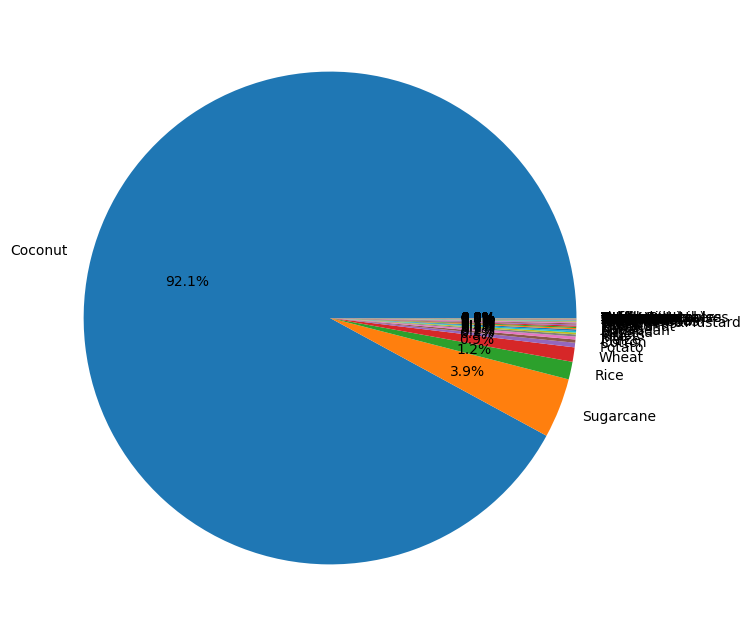

In [125]:
#plotting it with the help of a pie chart
plt.figure(figsize = (10,8))
plt.pie(val,labels = lab,autopct = '%0.1f%%')

In [127]:
#since we cannot visualize other crops we will make a copy of this data frame and drop the cocunut crop from the copied data frame
crop_data_copy_dropped_coconut = crop_data_copy

([<matplotlib.patches.Wedge at 0x269ee3a9350>,
 [Text(0.019003385664712297, 1.0998358383564695, 'Sugarcane'),
  Text(-1.00218855460779, -0.45345132154747236, 'Rice'),
  Text(-0.33808276347000826, -1.0467569178393246, 'Wheat'),
  Text(0.19786114817925202, -1.082058670332246, 'Potato'),
  Text(0.4115160359985009, -1.020124772817561, 'Cotton'),
  Text(0.5688423714737462, -0.9414979322420866, 'Maize'),
  Text(0.6870995673288645, -0.8590076743408568, 'Jute'),
  Text(0.7715303121196551, -0.7840541929487704, 'Millets'),
  Text(0.8383298115285495, -0.7121819480318965, 'Banana'),
  Text(0.8930861521504723, -0.6421815357335211, 'Soyabean'),
  Text(0.9378261100066296, -0.574875801708363, 'pulses'),
  Text(0.9736187647557211, -0.511924311705885, 'Jowar'),
  Text(1.004150983847703, -0.44908885717382285, 'Groundnut'),
  Text(1.0295944817874814, -0.3872146731113991, 'Tapioca'),
  Text(1.050102355637424, -0.3275439553475736, 'Gram'),
  Text(1.0660882154426163, -0.27102752054796536, 'Rapeseed &Mustard'

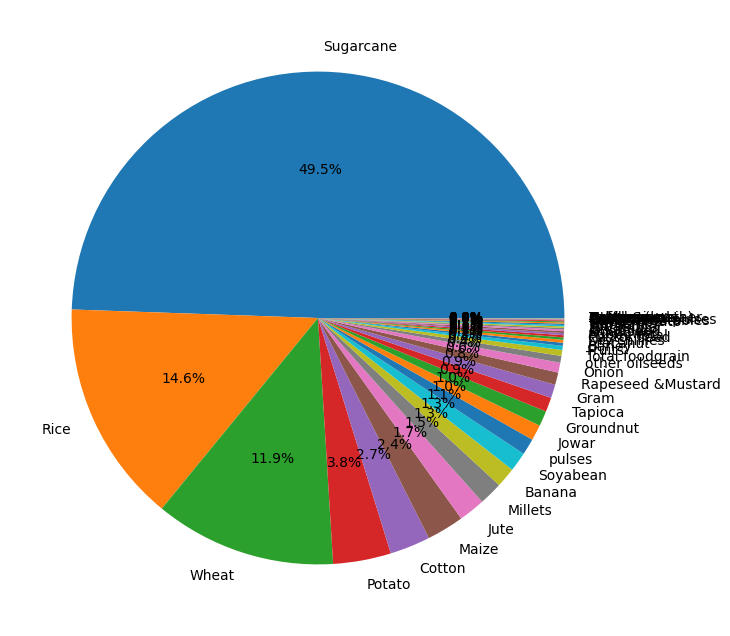

In [130]:
#plotting it with the help of a pie chart
plt.figure(figsize = (10,8))
plt.pie(val,labels = lab,autopct = '%0.1f%%')

In [131]:
crop_data_copy_dropped_coconut.to_excel(r'C:/Users/kenneth/OneDrive/Desktop/dev/Python Projects/Unified Mentor Internship/Crop Production Analysis in India/Crop_final.xlsx')

In [133]:
crop_data_copy_only_coconut

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Production_area_factor,Zone
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.00,65100000.0,3583.223250,Union Territory
14,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.00,64430000.0,3542.056075,Union Territory
23,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Coconut,18240.00,67490000.0,3700.109649,Union Territory
32,Andaman and Nicobar Islands,NICOBARS,2003,Whole Year,Coconut,18284.74,68580000.0,3750.668590,Union Territory
41,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Coconut,18394.70,52380000.0,2847.559351,Union Territory
...,...,...,...,...,...,...,...,...,...
245719,West Bengal,PURULIA,2004,Whole Year,Coconut,66.00,296.1,4.486364,East India
245756,West Bengal,PURULIA,2005,Whole Year,Coconut,74.00,311.0,4.202703,East India
245792,West Bengal,PURULIA,2006,Whole Year,Coconut,73.00,365000.0,5000.000000,East India
245837,West Bengal,PURULIA,2007,Whole Year,Coconut,58.00,898000.0,15482.758621,East India
